# Import libraries

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load Dataset

In [ ]:
df = pd.read_csv("./data/diabetes.csv", sep=",")

# Data preparation

## Scaling

In [ ]:
numeric = df.select_dtypes(include=np.number)
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
SEX,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
BMI,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
BP,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
S1,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
S2,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
S3,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
S4,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
S5,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
S6,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


In [10]:
scaler_std = StandardScaler()
scaled_std = pd.DataFrame(scaler_std.fit_transform(numeric), columns=numeric.columns)
scaled_std.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,8.037814e-18,1.001133,-2.254290,-0.784172,0.113172,0.800500,2.327895
SEX,442.0,1.607563e-16,1.001133,-0.938537,-0.938537,-0.938537,1.065488,1.065488
BMI,442.0,1.004727e-16,1.001133,-1.897929,-0.719625,-0.153132,0.656952,3.585718
BP,442.0,1.060991e-15,1.001133,-2.363050,-0.770650,-0.119214,0.749368,2.776058
S1,442.0,-2.893613e-16,1.001133,-2.665411,-0.720020,-0.090841,0.596193,3.235851
S2,442.0,-1.245861e-16,1.001133,-2.430626,-0.638249,-0.080291,0.627442,4.179278
S3,442.0,-1.326239e-16,1.001133,-2.150883,-0.738296,-0.138431,0.616239,3.809072
S4,442.0,-1.446806e-16,1.001133,-1.606102,-0.830301,-0.054499,0.721302,3.894331
S5,442.0,2.250588e-16,1.001133,-2.651040,-0.698949,-0.040937,0.681851,2.808722
S6,442.0,2.371155e-16,1.001133,-2.896390,-0.697549,-0.022657,0.586922,2.851075


In [9]:
scaler_mm = MinMaxScaler()
scaled_mm = pd.DataFrame(scaler_mm.fit_transform(numeric), columns=numeric.columns)
scaled_mm.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,442.0,0.491968,0.218484,0.0,0.320833,0.516667,0.666667,1.0
SEX,442.0,0.468326,0.499561,0.0,0.000000,0.000000,1.000000,1.0
BMI,442.0,0.346107,0.182567,0.0,0.214876,0.318182,0.465909,1.0
BP,442.0,0.459817,0.194807,0.0,0.309859,0.436620,0.605634,1.0
S1,442.0,0.451668,0.169647,0.0,0.329657,0.436275,0.552696,1.0
S2,442.0,0.367725,0.151460,0.0,0.271165,0.355578,0.462649,1.0
S3,442.0,0.360889,0.167977,0.0,0.237013,0.337662,0.464286,1.0
S4,442.0,0.291996,0.182010,0.0,0.141044,0.282087,0.423131,1.0
S5,442.0,0.485560,0.183366,0.0,0.357542,0.478062,0.610446,1.0
S6,442.0,0.503942,0.174187,0.0,0.382576,0.500000,0.606061,1.0


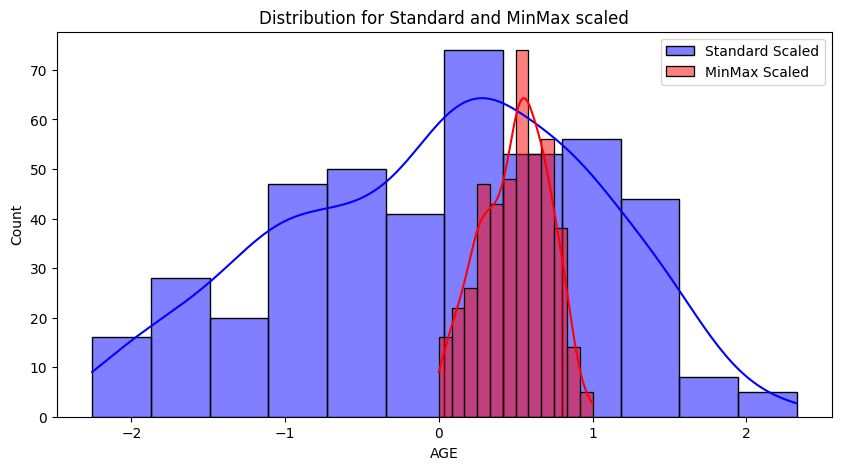

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(scaled_std.iloc[:,0], kde=True, color='blue', label='Standard Scaled')
sns.histplot(scaled_mm.iloc[:,0], kde=True, color='red', label='MinMax Scaled')
plt.legend()
plt.title('Distribution for Standard and MinMax scaled')
plt.show()

## Train Test Split

In [16]:
target = "Y"

X = df.drop(target, axis=1)
y = df[target]
test_size=0.2
random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print('Train size:', X_train.shape, '| Test size:', X_test.shape)

Train size: (353, 10) | Test size: (89, 10)


## Outliers detection

In [21]:
# IQR method

Q1 = numeric.quantile(0.25)
Q3 = numeric.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((numeric < (Q1 - 1.5 * IQR)) | (numeric > (Q3 + 1.5 * IQR))).sum()
print('Outliers detected per feature (IQR):')
print(outliers_iqr[outliers_iqr > 0])

Outliers detected per feature (IQR):
BMI    3
S1     8
S2     7
S3     7
S4     2
S5     4
S6     9
dtype: int64


In [22]:
# Z-score method

z_scores = np.abs(stats.zscore(df.select_dtypes(include='number')))
outliers_z = (z_scores > 3).sum(axis=0)
print('Outliers detected per feature (Z-score > 3):')
print(outliers_z[outliers_z > 0])

Outliers detected per feature (Z-score > 3):
[2 2 2 5 4]


In [30]:
scaler = RobustScaler()

numeric_cols = X_train.select_dtypes(include=np.number).columns

X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train_scaled.head()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
17,0.894737,1.0,0.266667,0.857143,0.622222,0.895288,-0.5625,0.5,0.418177,-0.066667
66,-0.263158,1.0,-0.200000,-0.380952,-0.266667,0.272251,-1.1250,1.0,0.013217,0.266667
137,-0.052632,0.0,0.850000,1.428571,-0.177778,-0.204188,0.0000,0.0,0.263796,-0.266667
245,-0.526316,0.0,-0.466667,-0.333333,-0.844444,-0.910995,0.6250,-0.5,-0.736340,-2.133333
31,-0.473684,0.0,-0.933333,-1.047619,-0.555556,-0.827225,1.1250,-1.0,-0.545851,-0.733333


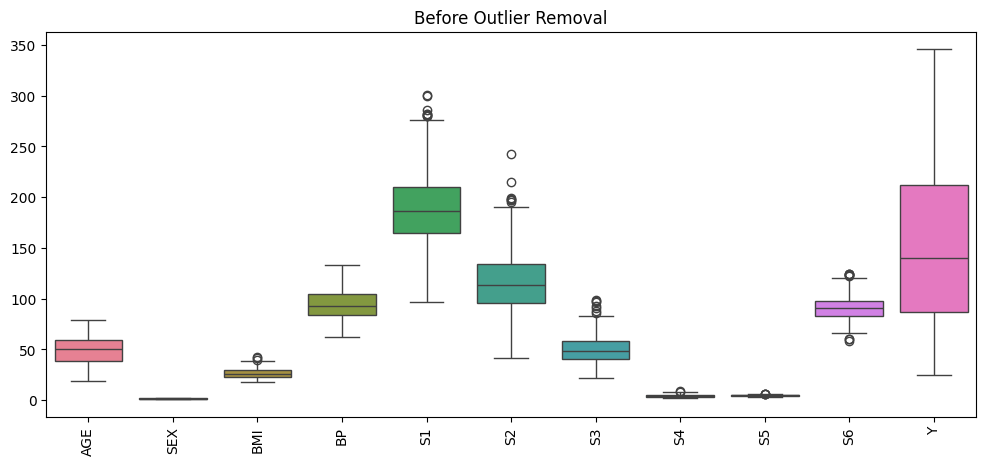

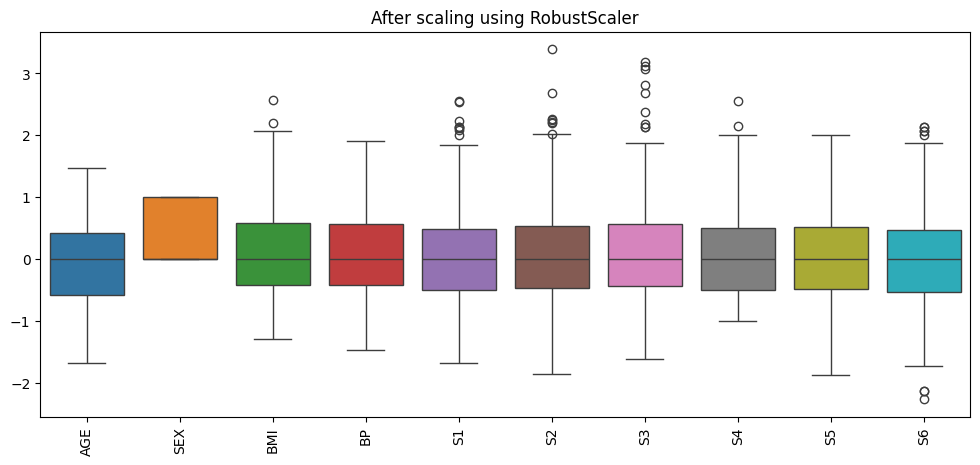

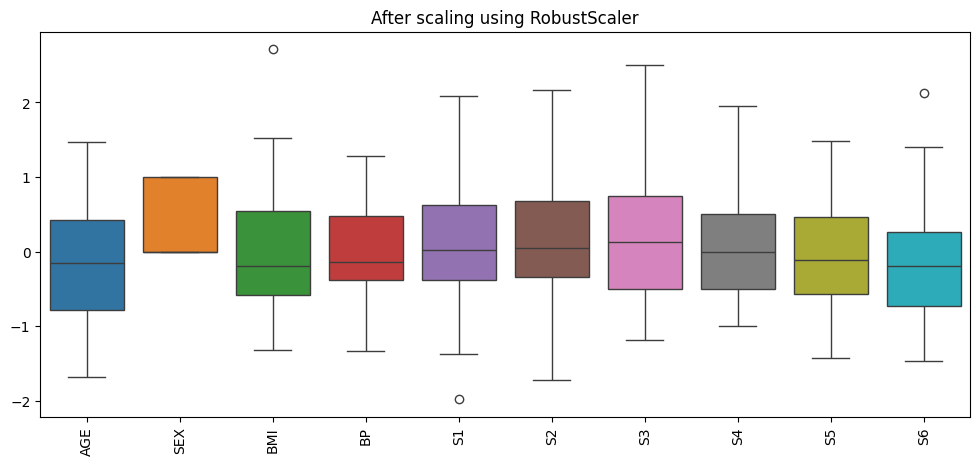

In [32]:
# Boxplots: Before vs After Outlier Removal

plt.figure(figsize=(12, 5))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Before Outlier Removal')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=X_train_scaled.select_dtypes(include='number'))
plt.title('After scaling using RobustScaler')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=X_test_scaled.select_dtypes(include='number'))
plt.title('After scaling using RobustScaler')
plt.xticks(rotation=90)
plt.show()

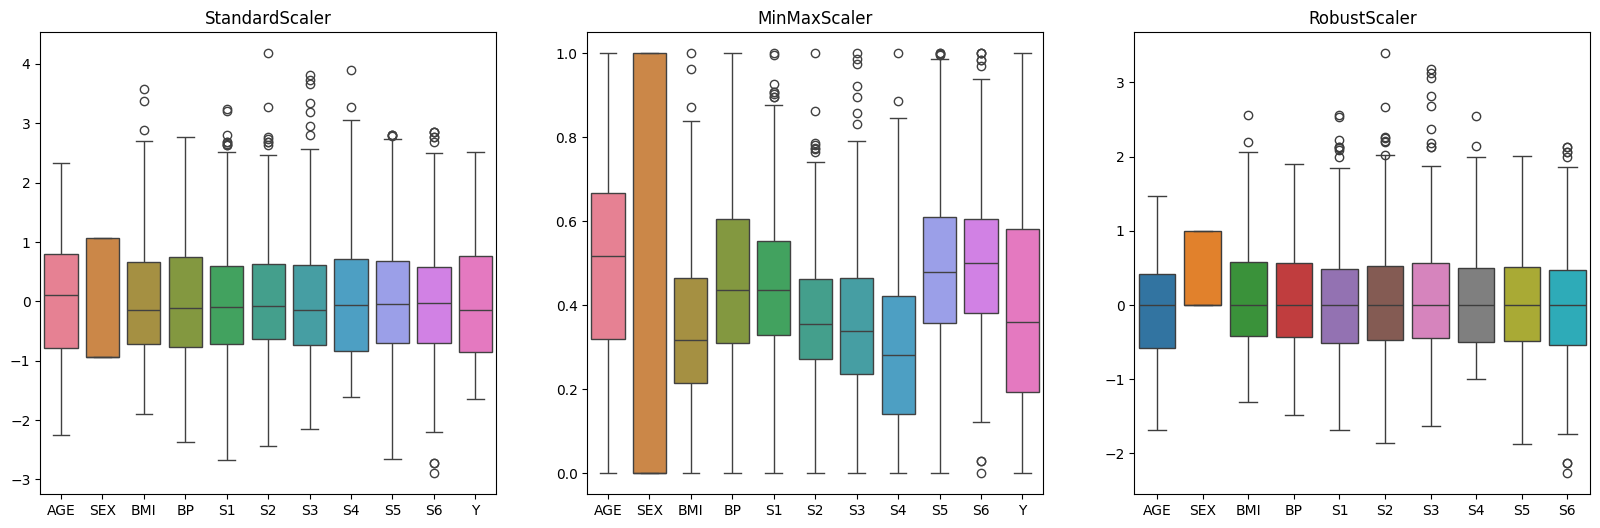

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

sns.boxplot(data=scaled_std, ax=axes[0])
axes[0].set_title("StandardScaler")

sns.boxplot(data=scaled_mm, ax=axes[1])
axes[1].set_title("MinMaxScaler")

sns.boxplot(data=X_train_scaled, ax=axes[2])
axes[2].set_title("RobustScaler")

plt.show()
